In [1]:
pip install pandas numpy ta yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import yfinance as yf
import ta
import matplotlib.pyplot as plt

# Define the ticker, start date, and end date
ticker = 'AMZN'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[*********************100%***********************]  1 of 1 completed


## ROC AMZN

C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\1816058134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['ROC'] > 0] = 1
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\1816058134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['ROC'] < 0] = -1


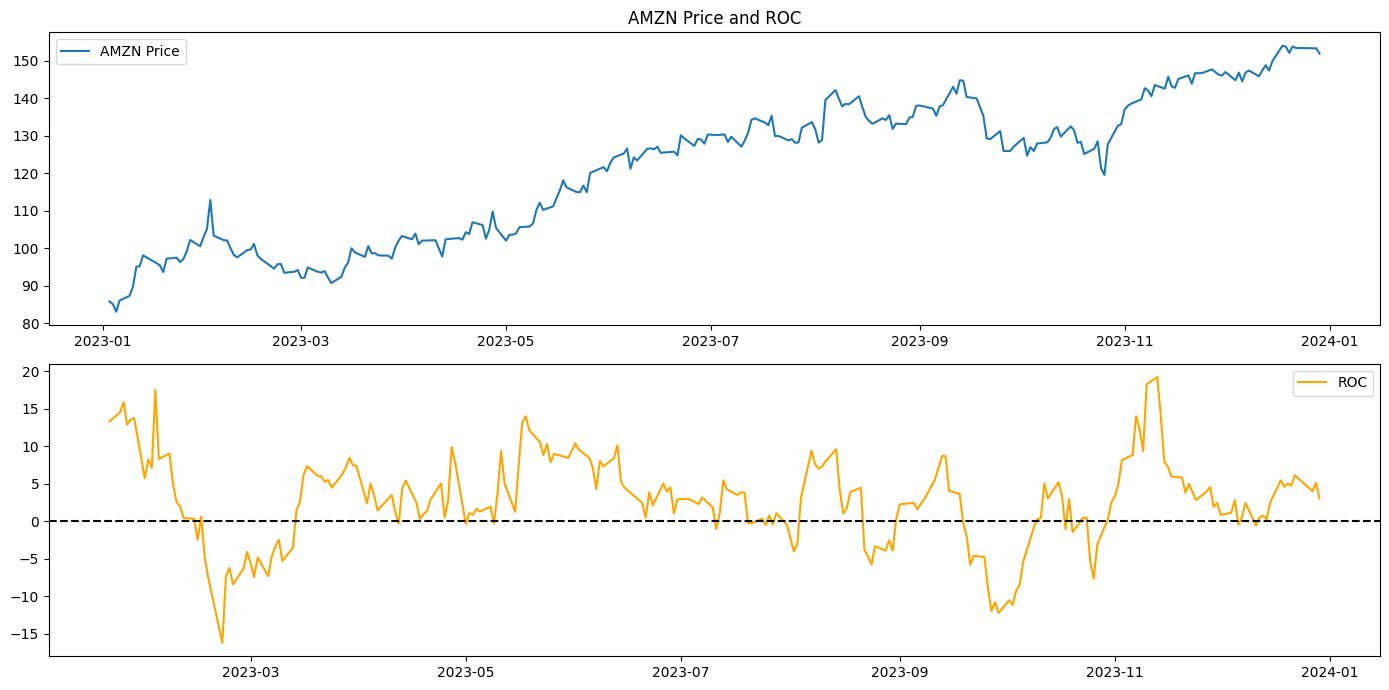

Total Strategy Return: -7.02%


In [3]:
# Calculate Price Rate of Change (ROC)
data['ROC'] = data['Close'].pct_change(periods=12) * 100

# Generate buy/sell signals
data['Signal'] = 0
data['Signal'][data['ROC'] > 0] = 1
data['Signal'][data['ROC'] < 0] = -1

# Calculate profitability
data['Strategy_Return'] = data['Signal'].shift(1) * data['Close'].pct_change()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plotting
plt.figure(figsize=(14, 7))

# Plot price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='AMZN Price')
plt.title('AMZN Price and ROC')
plt.legend()

# Plot ROC
plt.subplot(2, 1, 2)
plt.plot(data['ROC'], label='ROC', color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# Print profitability
print(f"Total Strategy Return: {data['Cumulative_Strategy_Return'].iloc[-1] - 1:.2%}")


Sharpe Ratio: -0.0722
Maximum Drawdown: -23.12%
Annualized Standard Deviation of Returns: 31.78%


TypeError: '<=' not supported between instances of 'range' and 'int'

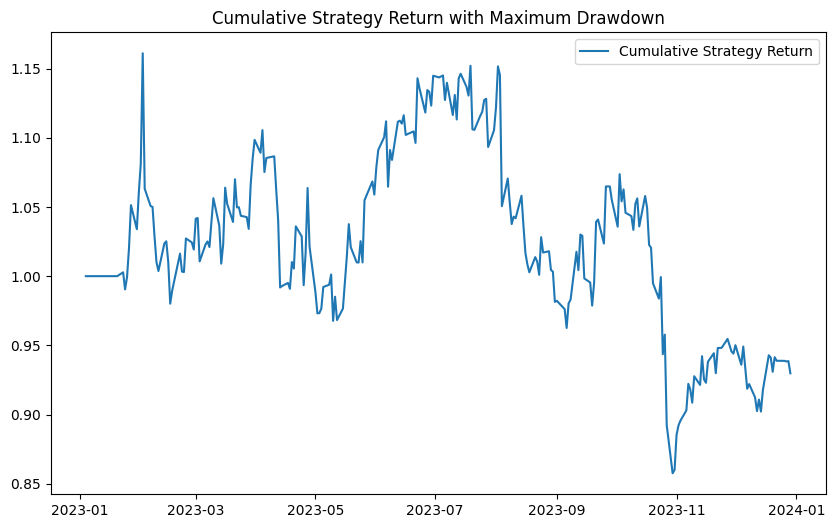

In [4]:
import numpy as np

# **Sharpe Ratio Calculation**
# Assuming risk-free rate (Rf) is 0 for simplicity
Rf = 0
data['Strategy_Excess_Return'] = data['Strategy_Return'] - Rf
Sharpe_Ratio = data['Strategy_Excess_Return'].mean() / data['Strategy_Excess_Return'].std() * np.sqrt(252)
print(f"Sharpe Ratio: {Sharpe_Ratio:.4f}")

# **Maximum Drawdown Calculation**
def max_drawdown(cum_returns):
    end_index = np.argmax(np.maximum.accumulate(cum_returns) - cum_returns)
    begin_index = np.argmax(cum_returns[:end_index])
    max_drawdown_value = (cum_returns[end_index] - cum_returns[begin_index]) * 100
    return max_drawdown_value

max_dd = max_drawdown(data['Cumulative_Strategy_Return'])
print(f"Maximum Drawdown: {max_dd:.2f}%")

# **Profit/Loss Variability (Standard Deviation of Returns)**
return_std_dev = data['Strategy_Return'].std() * np.sqrt(252) * 100
print(f"Annualized Standard Deviation of Returns: {return_std_dev:.2f}%")

# --- Additional Plot for Drawdown ---

plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Strategy_Return'], label='Cumulative Strategy Return')
plt.title('Cumulative Strategy Return with Maximum Drawdown')
plt.legend()

# Highlighting the maximum drawdown period
begin_index = np.argmax(data['Cumulative_Strategy_Return'][:np.argmax(np.maximum.accumulate(data['Cumulative_Strategy_Return']) - data['Cumulative_Strategy_Return'])])
end_index = np.argmax(np.maximum.accumulate(data['Cumulative_Strategy_Return']) - data['Cumulative_Strategy_Return'])
plt.fill_between(range(len(data)), data['Cumulative_Strategy_Return'], where=(range(len(data)) >= begin_index) & (range(len(data)) <= end_index), alpha=0.5, color='red', label='Maximum Drawdown')
plt.legend()
plt.show()

# VWAP

[*********************100%***********************]  1 of 1 completed
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\2115923109.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Close'] > data['VWAP']] = 1
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\2115923109.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Close'] < data['VWAP']] = -1


Strategy Performance Metrics:
Total Strategy Return: 62.15%
Sharpe Ratio: 1.5842
Maximum Drawdown: 19.22%
Annualized Standard Deviation: 33.09%


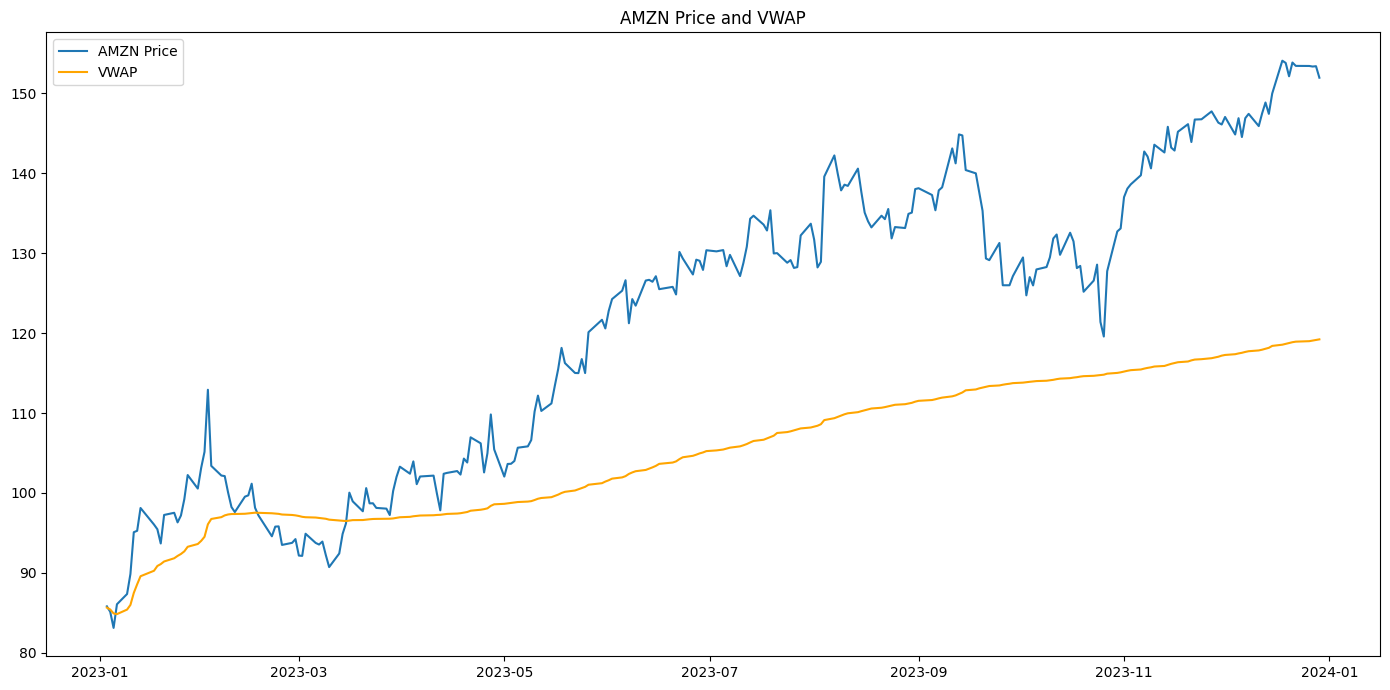

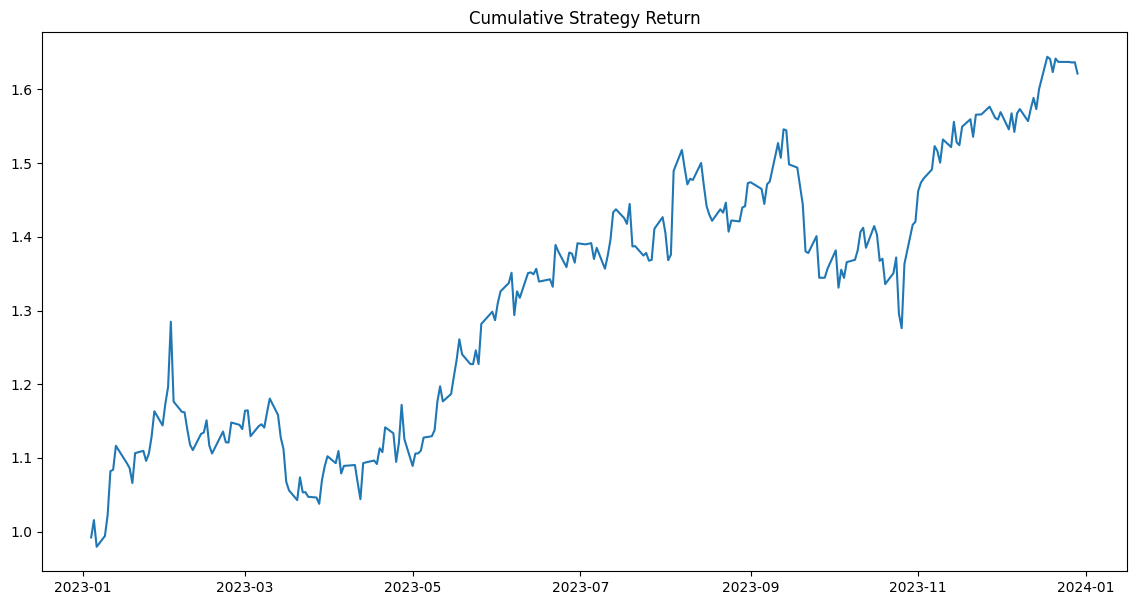

In [5]:
import pandas as pd
import yfinance as yf
import ta
import matplotlib.pyplot as plt
import numpy as np

# Define the ticker, start date, and end date
ticker = 'AMZN'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# Calculate VWAP
data['Typical_Price'] = (data['Close'] + data['High'] + data['Low']) / 3
data['VWAP'] = (data['Typical_Price'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Generate buy/sell signals
data['Signal'] = 0
data['Signal'][data['Close'] > data['VWAP']] = 1
data['Signal'][data['Close'] < data['VWAP']] = -1

# Calculate profitability
data['Strategy_Return'] = data['Signal'].shift(1) * data['Close'].pct_change()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Calculate metrics
def calculate_metrics(data, risk_free_rate=0.02):
    """
    Calculate Sharpe Ratio, Maximum Drawdown, and Annualized Standard Deviation.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing 'Strategy_Return' column.
    - risk_free_rate (float, optional): Annual risk-free rate. Defaults to 0.02.
    
    Returns:
    - sharpe_ratio (float)
    - max_drawdown (float)
    - annualized_std_dev (float)
    """
    # Calculate daily risk-free rate
    daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1
    
    # Calculate excess returns
    excess_returns = data['Strategy_Return'] - daily_risk_free_rate
    
    # Sharpe Ratio
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    
    # Maximum Drawdown
    peak = data['Cumulative_Strategy_Return'].cummax()
    drawdown = (data['Cumulative_Strategy_Return'] - peak) / peak
    max_drawdown = abs(drawdown).max()
    
    # Annualized Standard Deviation
    annualized_std_dev = data['Strategy_Return'].std() * np.sqrt(252)
    
    return sharpe_ratio, max_drawdown, annualized_std_dev

# Calculate and print metrics
sharpe_ratio, max_drawdown, annualized_std_dev = calculate_metrics(data)

print("Strategy Performance Metrics:")
print(f"Total Strategy Return: {data['Cumulative_Strategy_Return'].iloc[-1] - 1:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")
print(f"Annualized Standard Deviation: {annualized_std_dev*100:.2f}%")

# Plotting
plt.figure(figsize=(14, 7))

# Plot price and VWAP
plt.plot(data['Close'], label='AMZN Price')
plt.plot(data['VWAP'], label='VWAP', color='orange')
plt.title('AMZN Price and VWAP')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Plot cumulative strategy return
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Strategy_Return'])
plt.title('Cumulative Strategy Return')
plt.show()


# Buy and Hold

[*********************100%***********************]  1 of 1 completed


The stock return for AMZN from 2023-01-01 to 2023-12-31 is 77.04%
Sharpe Ratio: 1.9163
Max Drawdown: 19.64%
Annualized Standard Deviation of Returns: 33.03%


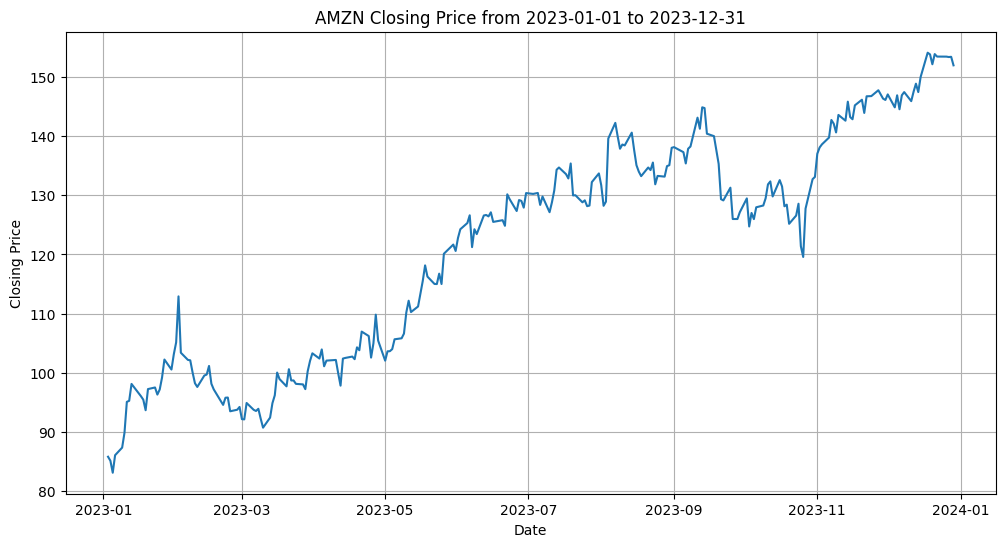

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define the ticker, start date, and end date
ticker = 'AMZN'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Suppress all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate the stock return for the entire period in percentage
start_price = data['Close'].iloc[0]
end_price = data['Close'].iloc[-1]
stock_return = ((end_price - start_price) / start_price) * 100

print(f'The stock return for {ticker} from {start_date} to {end_date} is {stock_return:.2f}%')

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Calculate Sharpe Ratio (Assuming risk-free rate = 0 for simplicity)
risk_free_rate = 0  # Annual risk-free rate in decimal form (e.g., 2% = 0.02)
sharpe_ratio = (data['Return'].mean() * 252 - risk_free_rate) / (data['Return'].std() * np.sqrt(252))
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')

# Calculate Max Drawdown
peak = data['Close'].cummax()
drawdown = (data['Close'] / peak) - 1
max_drawdown = drawdown.min() * 100
print(f'Max Drawdown: {abs(max_drawdown):.2f}%')

# Calculate Annualized Standard Deviation of Returns
annualized_std_dev = data['Return'].std() * np.sqrt(252) * 100
print(f'Annualized Standard Deviation of Returns: {annualized_std_dev:.2f}%')

# Plot the closing price over time
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title(f'{ticker} Closing Price from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Combination

This code below calculates the VWAP and ROC using the ta library, and then generates buy and sell signals based on the conditions:

Buy signal: VWAP > Close and ROC > 0
Sell signal: VWAP < Close and ROC < 0
The code then calculates the stock return by subtracting the buy price from the sell price, dividing by the buy price, and multiplying by 100 to convert to a percentage.

Additionally, the code includes a plot of the closing price, VWAP, and ROC over time using matplotlib.

The stock return for AMZN from 2023-01-01 to 2023-12-31 using VWAP and ROC strategy is 49.46%


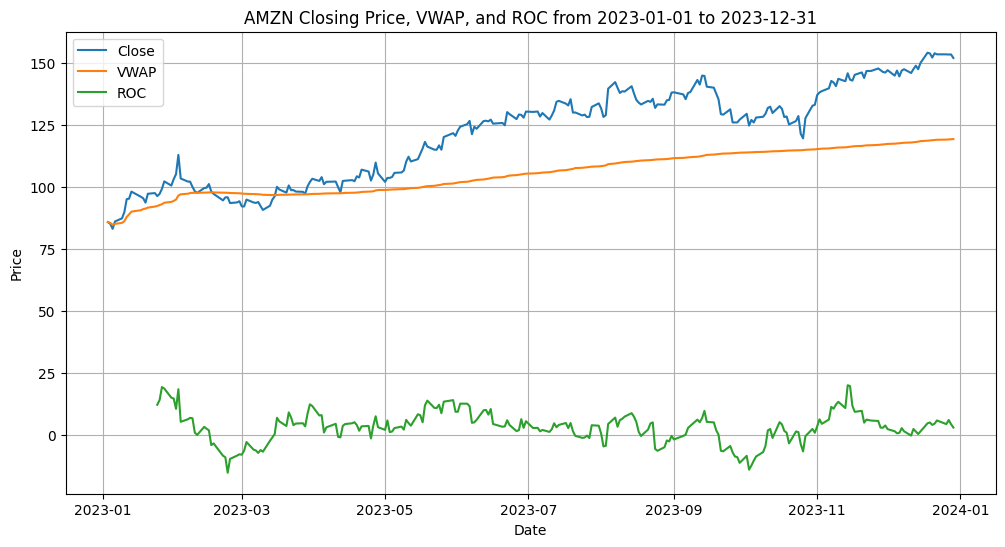

In [7]:
# Calculate VWAP
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Calculate ROC
data['ROC'] = ta.momentum.roc(data['Close'], window=14)

# Define a function to generate buy and sell signals
def generate_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals['Buy'] = False
    signals['Sell'] = False
    
    # Buy signal: VWAP > Close and ROC > 0
    signals.loc[(data['VWAP'] > data['Close']) & (data['ROC'] > 0), 'Buy'] = True
    
    # Sell signal: VWAP < Close and ROC < 0
    signals.loc[(data['VWAP'] < data['Close']) & (data['ROC'] < 0), 'Sell'] = True
    
    return signals

# Generate buy and sell signals
signals = generate_signals(data)

# Calculate the stock return for the entire period in percentage
buy_price = data.loc[signals['Buy'], 'Close'].iloc[0]
sell_price = data.loc[signals['Sell'], 'Close'].iloc[-1]
stock_return = ((sell_price - buy_price) / buy_price) * 100

print(f'The stock return for {ticker} from {start_date} to {end_date} using VWAP and ROC strategy is {stock_return:.2f}%')

# Plot the closing price, VWAP, and ROC over time
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close')
plt.plot(data['VWAP'], label='VWAP')
plt.plot(data['ROC'], label='ROC')
plt.title(f'{ticker} Closing Price, VWAP, and ROC from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\625637217.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strategy_Returns'].iloc[0] = 0  # First row is NaN, set to 0 since we don't have a previous day's position to base it on


Sharpe Ratio: -1.7463
Max Drawdown: 0.00%
Annualized Standard Deviation of Returns: 16.18%


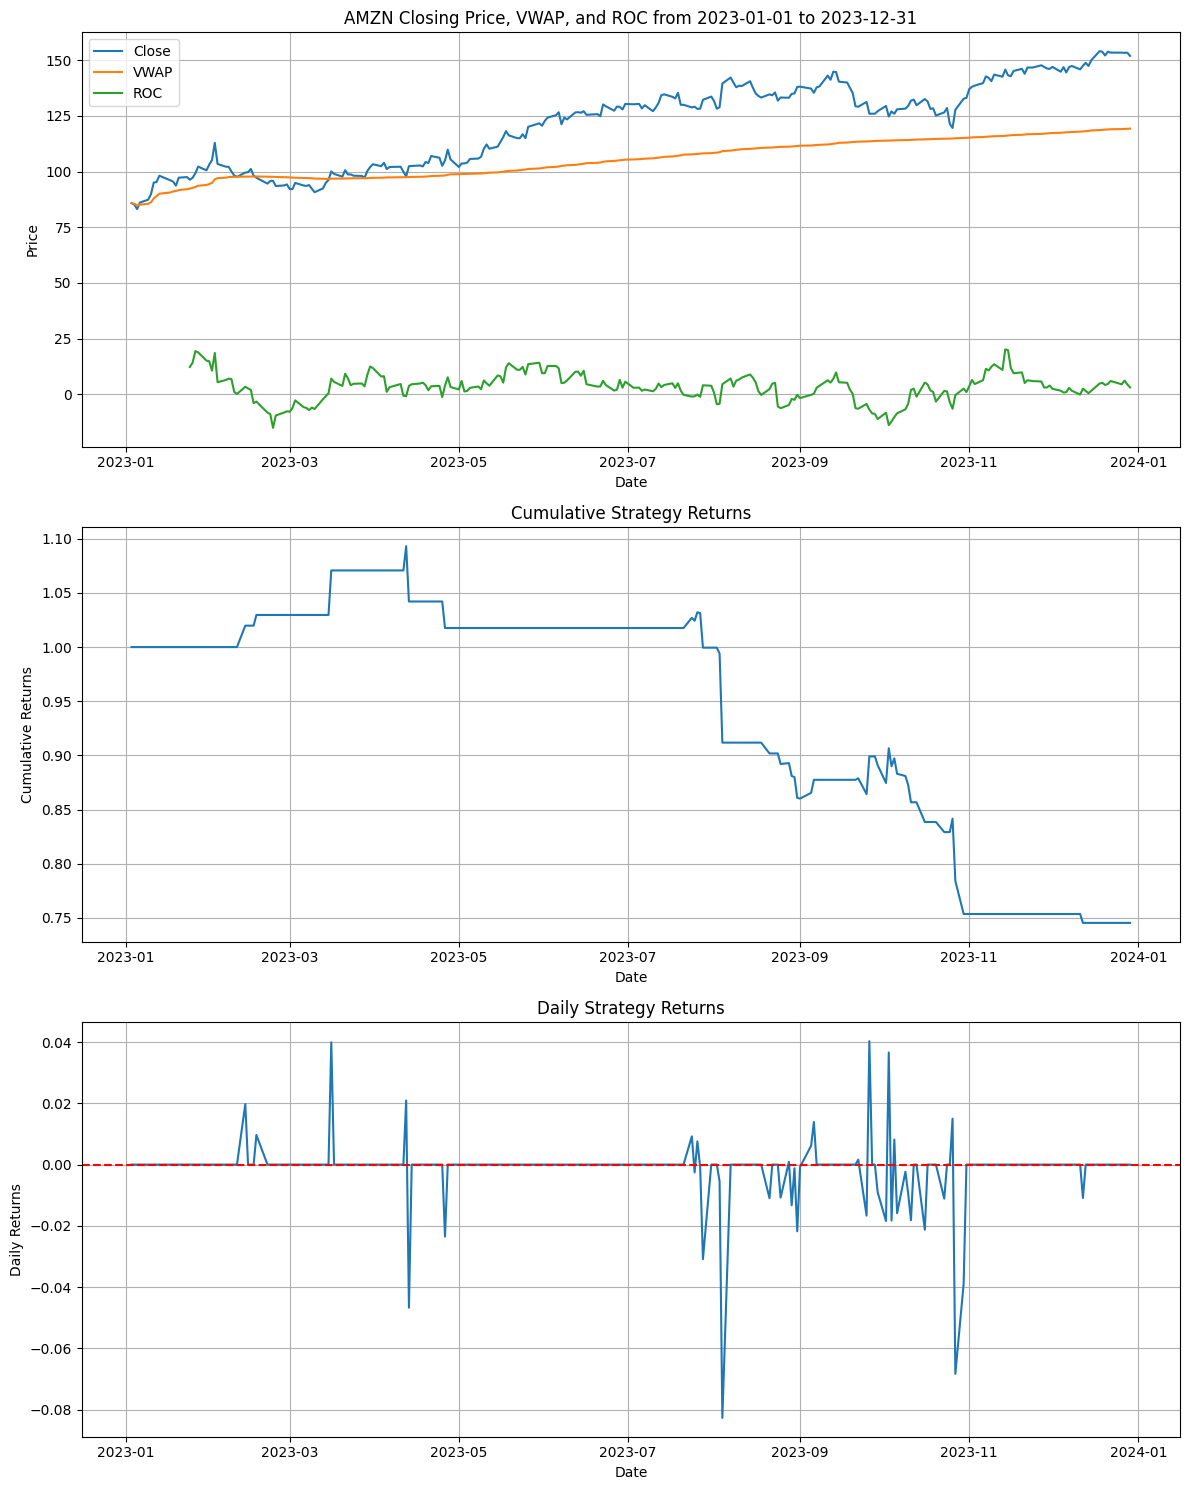

In [8]:
import pandas as pd
import yfinance as yf
import ta
import matplotlib.pyplot as plt
import numpy as np

# Define the ticker, start date, and end date
ticker = 'AMZN'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate VWAP
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Calculate ROC
data['ROC'] = ta.momentum.roc(data['Close'], window=14)

# Define a function to generate buy and sell signals
def generate_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals['Buy'] = False
    signals['Sell'] = False
    signals['Position'] = 0  # 1 for long, -1 for short, 0 for flat
    
    # Buy signal: VWAP > Close and ROC > 0
    buy_conditions = (data['VWAP'] > data['Close']) & (data['ROC'] > 0)
    signals.loc[buy_conditions, 'Buy'] = True
    signals.loc[buy_conditions, 'Position'] = 1
    
    # Sell signal: VWAP < Close and ROC < 0
    sell_conditions = (data['VWAP'] < data['Close']) & (data['ROC'] < 0)
    signals.loc[sell_conditions, 'Sell'] = True
    signals.loc[sell_conditions, 'Position'] = -1
    
    # Forward fill positions
    signals['Position'] = signals['Position'].ffill().fillna(0)
    
    return signals

# Generate buy and sell signals
signals = generate_signals(data)

# Calculate daily returns based on signals
data['Strategy_Returns'] = data['Close'].pct_change() * signals['Position'].shift(1)
data['Strategy_Returns'].iloc[0] = 0  # First row is NaN, set to 0 since we don't have a previous day's position to base it on

# Calculate cumulative strategy returns
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Calculate Sharpe Ratio (assuming risk-free rate of 0 for simplicity)
def sharpe_ratio(returns, risk_free_rate=0, periods=252):
    volatility = returns.std() * np.sqrt(periods)
    sharpe = (returns.mean() * periods - risk_free_rate) / volatility
    return sharpe

strategy_returns = data['Strategy_Returns'].dropna()
sharpe = sharpe_ratio(strategy_returns)

# Calculate Max Drawdown
def max_drawdown(cum_returns):
    end_index = np.argmax(np.cumprod(1 + cum_returns)) + 1
    begin_index = np.argmax(cum_returns[:end_index]) + 1
    return np.cumprod(1 + cum_returns[begin_index:end_index]).min() - 1

max_dd = max_drawdown(data['Strategy_Returns'].dropna())

# Calculate Annualized Standard Deviation of returns
annualized_std_dev = data['Strategy_Returns'].std() * np.sqrt(252)

print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Max Drawdown: {max_dd*100:.2f}%")
print(f"Annualized Standard Deviation of Returns: {annualized_std_dev*100:.2f}%")

# Plot the closing price, VWAP, ROC, and strategy performance
fig, axs = plt.subplots(3, figsize=(12, 15))

axs[0].plot(data['Close'], label='Close')
axs[0].plot(data['VWAP'], label='VWAP')
axs[0].plot(data['ROC'], label='ROC')
axs[0].set_title(f'{ticker} Closing Price, VWAP, and ROC from {start_date} to {end_date}')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(data['Cumulative_Strategy_Returns'])
axs[1].set_title('Cumulative Strategy Returns')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cumulative Returns')
axs[1].grid(True)

axs[2].plot(data['Strategy_Returns'])
axs[2].axhline(y=0, color='r', linestyle='--')
axs[2].set_title('Daily Strategy Returns')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Daily Returns')
axs[2].grid(True)

plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\1538038039.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['ROC'] > 0] = 1
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\1538038039.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['ROC'] < 0] = -1
C:\Users\v3_ag\AppData\Local\Temp\ipykernel_33048\1538038039.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

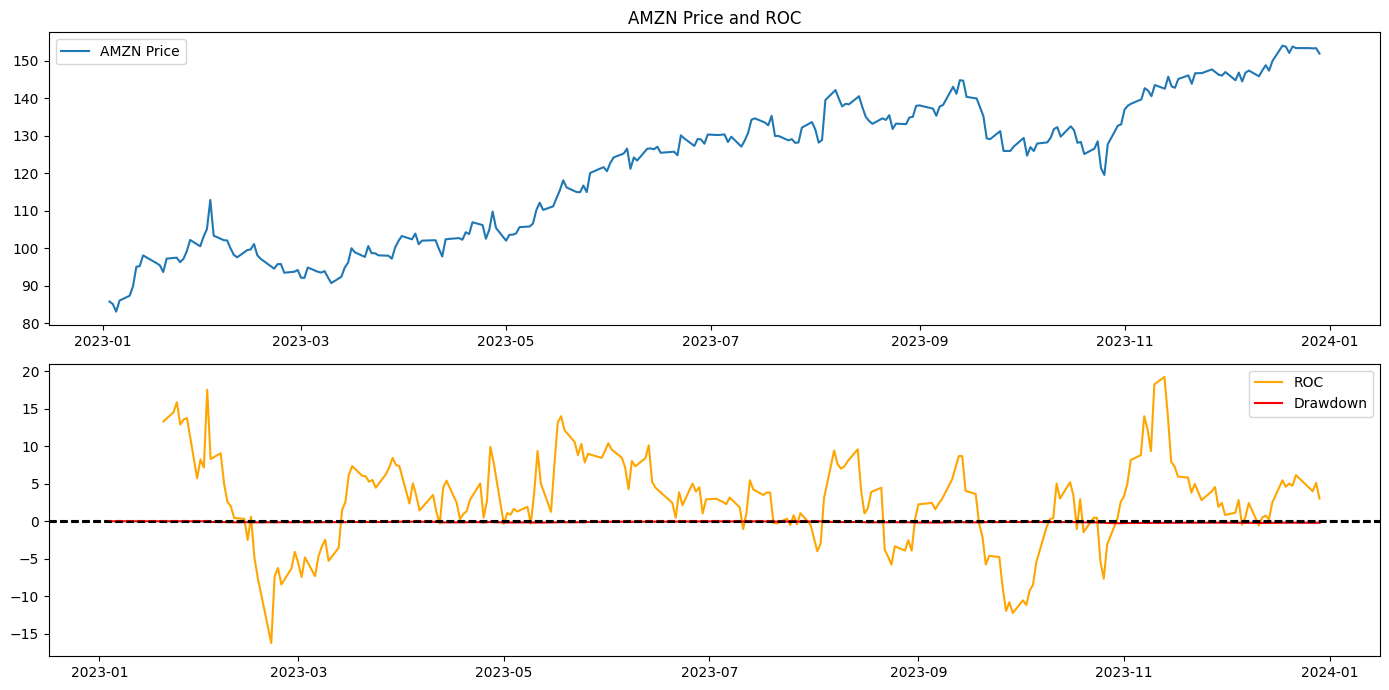

Total Strategy Return: 127.84%


In [9]:
import pandas as pd
import yfinance as yf
import ta
import matplotlib.pyplot as plt

# Define the ticker, start date, and end date
ticker = 'AMZN'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Suppress all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate Price Rate of Change (ROC)
data['ROC'] = data['Close'].pct_change(periods=12) * 100

# Generate buy/sell signals
data['Signal'] = 0
data['Signal'][data['ROC'] > 0] = 1
data['Signal'][data['ROC'] < 0] = -1

# Calculate profitability
data['Strategy_Return'] = data['Signal'].shift(1) * data['Close'].pct_change()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Implement stop loss after 5% drawdown
data['Drawdown'] = data['Cumulative_Strategy_Return'] / data['Cumulative_Strategy_Return'].cummax() - 1
data['Stop_Loss'] = 0
data['Stop_Loss'][data['Drawdown'] < -0.05] = 1

# Buy again according to signals after stop loss
data['Buy_Again'] = 0
data['Buy_Again'][(data['Stop_Loss'] == 1) & (data['Signal'] > 0)] = 1

# Update strategy returns based on stop loss and buy again signals
data['Strategy_Return'] = data['Strategy_Return'] * (1 - data['Stop_Loss']) + data['Buy_Again'] * data['Close'].pct_change()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plotting
plt.figure(figsize=(14, 7))

# Plot price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='AMZN Price')
plt.title('AMZN Price and ROC')
plt.legend()

# Plot ROC
plt.subplot(2, 1, 2)
plt.plot(data['ROC'], label='ROC', color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

# Plot drawdown and stop loss
plt.subplot(2, 1, 2)
plt.plot(data['Drawdown'], label='Drawdown', color='red')
plt.axhline(y=-0.05, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# Print profitability
print(f"Total Strategy Return: {data['Cumulative_Strategy_Return'].iloc[-1] - 1:.2%}")
